In [3]:
import os
import numpy as np
import cv2
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


In [4]:
def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        folder_path = os.path.join(directory, label)
        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (128, 128))  # Resize to 128x128
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


In [5]:
train_dir = 'train_data'
test_dir = 'test_data'
predict_dir = 'predict_data'

# Load datasets
X_train, y_train = load_images_from_directory(train_dir)
X_test, y_test = load_images_from_directory(test_dir)
X_predict, _ = load_images_from_directory(predict_dir)


In [6]:
# Flatten images
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
X_predict = X_predict.reshape(len(X_predict), -1)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_predict = scaler.transform(X_predict)


In [8]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform grid search
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
svm_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  25.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   4.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   3.7s
[CV] END .....................C=0.1, gamma=0.001,

In [9]:
# Predict on test data
y_pred_test = svm_model.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       101
           1       0.87      0.79      0.83       101

    accuracy                           0.84       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.84      0.84      0.84       202

Test Accuracy: 0.8366336633663366


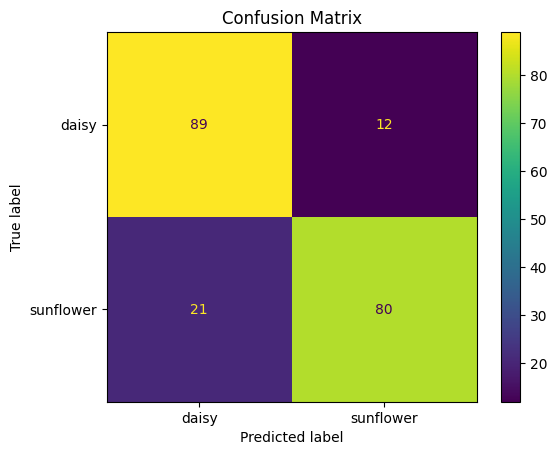

In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


In [14]:
# Predict on new data
y_predicted = svm_model.predict(X_predict)
predicted_labels = label_encoder.inverse_transform(y_predicted)

# Display predictions
print("Predictions for New Data:")
for i, label in enumerate(predicted_labels):
    print(f"Image {i + 1}: {label}")


Predictions for New Data:
Image 1: daisy
Image 2: daisy
Image 3: daisy
Image 4: daisy
Image 5: daisy
Image 6: daisy
Image 7: sunflower
Image 8: daisy
Image 9: daisy
Image 10: daisy
Image 11: daisy
Image 12: daisy
Image 13: daisy
Image 14: daisy
Image 15: daisy
Image 16: daisy
Image 17: daisy
Image 18: daisy
Image 19: daisy
Image 20: daisy
Image 21: daisy
Image 22: daisy
Image 23: daisy
Image 24: daisy
Image 25: daisy
Image 26: daisy
Image 27: daisy
Image 28: daisy
Image 29: daisy
Image 30: daisy
Image 31: daisy
Image 32: daisy
Image 33: daisy
Image 34: daisy
Image 35: daisy
Image 36: daisy
Image 37: sunflower
Image 38: daisy
Image 39: daisy
Image 40: daisy
Image 41: daisy
Image 42: daisy
Image 43: daisy
Image 44: daisy
Image 45: sunflower
Image 46: sunflower
Image 47: daisy
Image 48: daisy
Image 49: daisy
Image 50: daisy
Image 51: daisy
Image 52: sunflower
Image 53: sunflower
Image 54: sunflower
Image 55: sunflower
Image 56: sunflower
Image 57: daisy
Image 58: sunflower
Image 59: daisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3518244377524367..2.2454897569893353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.388547773018681..3.341441478019607].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.079133900274638..2.7158571428538805].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2722006932098777..2.1414332613819234].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5493313744484922..3.845851446263668].


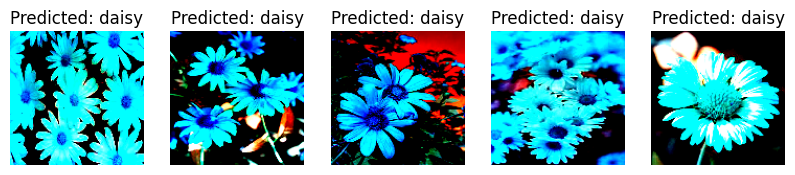

In [15]:
# Reshape images for visualization
sample_images = X_predict[:5].reshape(-1, 128, 128, 3)  # First 5 images
sample_predictions = svm_model.predict(X_predict[:5])
sample_labels = label_encoder.inverse_transform(sample_predictions)

# Plot the images with predictions
plt.figure(figsize=(10, 5))
for i in range(len(sample_images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {sample_labels[i]}")
    plt.axis('off')
plt.show()
